In [1]:
from mlp import *
import matplotlib.pyplot as plt
from torch.autograd import Variable
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [2]:
def get_acc(model,loader):
    acc = 0
    for ex in loader:
        inputs,labels = ex
        inputs = Variable(inputs)
        labels = Variable(labels)
        acc += float((((torch.max(model(inputs),1)[1]==labels).float().mean())*100.0))
    acc /= len(loader)
    return acc

# Part 1

## Initialization

In [3]:
# Training params
criterion = nn.CrossEntropyLoss()
epochs = 10
h0,h1,h2,h3 = 784,600,300,10
sizes = [h0,h1,h2,h3]
batch_size = 10

trainloader,testloader = load_MNIST(batch_size)

In [3]:
def plot_losses(trainlosses,testlosses,epochs):
    #Loss vs n. epochs
    xs = [i for i in range(epochs)]

    plt.figure()
    h1, = plt.plot(xs,trainlosses,"r",label='Train Loss')
    h2, = plt.plot(xs,testlosses,"g",label='Test Loss')
    plt.legend(handles=[h1,h2])
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Loss as a function of number of epochs")
    plt.show()

### Subquestion 1 (init method : Zero)

In [4]:
init_method = torch.zeros_like

In [5]:
gbrassard = MLP(sizes, init_method)
optimizer = optim.SGD(gbrassard.parameters(), lr=0.001, momentum=0.9)

# Train it!
trainlosses,testlosses = gbrassard.train(trainloader,epochs,criterion,optimizer,ret_test_losses=True,testloader=testloader)

Will return test losses too
[0] Train loss: 2.303
[0] Test loss: 2.302
[1] Train loss: 2.302
[1] Test loss: 2.302
[2] Train loss: 2.302
[2] Test loss: 2.302
[3] Train loss: 2.302
[3] Test loss: 2.302
[4] Train loss: 2.302
[4] Test loss: 2.302
[5] Train loss: 2.302
[5] Test loss: 2.302
[6] Train loss: 2.302
[6] Test loss: 2.302
[7] Train loss: 2.302
[7] Test loss: 2.302
[8] Train loss: 2.302
[8] Test loss: 2.301
[9] Train loss: 2.302
[9] Test loss: 2.301
Finished Training


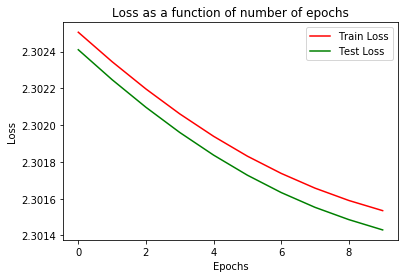

In [6]:
plot_losses(trainlosses,testlosses,epochs)

### Subquestion 2 (init method:  Normal)

In [7]:
init_method=torch.nn.init.normal

In [8]:
gbrassard = MLP(sizes, init_method)
optimizer = optim.SGD(gbrassard.parameters(), lr=0.001, momentum=0.9)

# Train it!
trainlosses,testlosses = gbrassard.train(trainloader,epochs,criterion,optimizer,ret_test_losses=True,testloader=testloader)

Will return test losses too
[0] Train loss: 2.331
[0] Test loss: 2.343
[1] Train loss: 2.277
[1] Test loss: 2.276
[2] Train loss: 2.182
[2] Test loss: 2.110
[3] Train loss: 2.071
[3] Test loss: 2.057
[4] Train loss: 2.028
[4] Test loss: 2.003
[5] Train loss: 1.990
[5] Test loss: 1.977
[6] Train loss: 1.963
[6] Test loss: 2.008
[7] Train loss: 1.976
[7] Test loss: 1.952
[8] Train loss: 1.934
[8] Test loss: 1.944
[9] Train loss: 1.919
[9] Test loss: 1.946
Finished Training


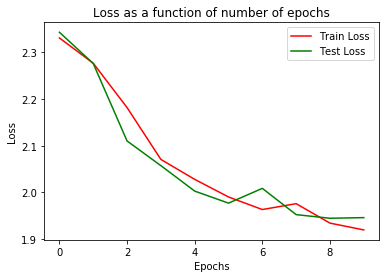

In [9]:
plot_losses(trainlosses,testlosses,epochs)

### Subquestion 3 (init method: Glorot uniform)

In [10]:
init_method=torch.nn.init.xavier_uniform

In [11]:
gbrassard = MLP(sizes, init_method)
optimizer = optim.SGD(gbrassard.parameters(), lr=0.001, momentum=0.9)

# Train it!
trainlosses,testlosses = gbrassard.train(trainloader,epochs,criterion,optimizer,ret_test_losses=True,testloader=testloader)

Will return test losses too
[0] Train loss: 1.814
[0] Test loss: 1.618
[1] Train loss: 1.579
[1] Test loss: 1.553
[2] Train loss: 1.551
[2] Test loss: 1.541
[3] Train loss: 1.539
[3] Test loss: 1.532
[4] Train loss: 1.531
[4] Test loss: 1.527
[5] Train loss: 1.524
[5] Test loss: 1.522
[6] Train loss: 1.519
[6] Test loss: 1.518
[7] Train loss: 1.514
[7] Test loss: 1.513
[8] Train loss: 1.511
[8] Test loss: 1.512
[9] Train loss: 1.507
[9] Test loss: 1.509
Finished Training


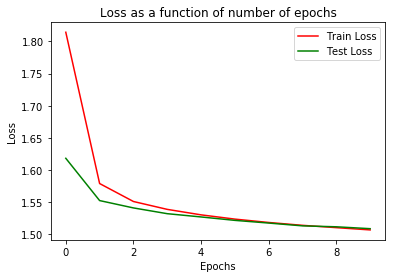

In [12]:
plot_losses(trainlosses,testlosses,epochs)

With the Zero Initialization, we do not see a good result on the loss as it does not differ a lot from its initial value. The Normal Initialization sees a similar initial loss as Zero Init, but it has a better convergence already. Glorot has both the best initialization and final value, with drastically better results than the previous two. 

## Learning curves

In [5]:
def plot_accuracy(model,trainloader,testloader,epochs,batch_size,optimizer,criterion,print_acc=True):
    #Accuracy vs n. epochs
    xs = [i for i in range(epochs)]
    train_acc = []
    test_acc = []
    for i in xs:
        model.train(trainloader,1,criterion,optimizer,quiet=True)
        #train accuracy
        acc = get_acc(model,trainloader)
        train_acc.append(acc)
        if print_acc:
            print("Train accuracy:",acc)
        #test accuracy
        acc = get_acc(model,testloader)
        test_acc.append(acc)
        if print_acc:
            print("Test accuracy:",acc)
        
    plt.figure()
    h1, = plt.plot(xs,train_acc,"r",label='Train Accuracy')
    h2, = plt.plot(xs,test_acc,"g",label='Test Accuracy')
    plt.legend(handles=[h1,h2])
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy (%)")
    plt.title("Accuracy as a function of number of epochs")
    plt.show()

In [34]:
# Training params
criterion = nn.CrossEntropyLoss()
epochs = 20
h0,h1,h2,h3 = 784,600,450,10
sizes = [h0,h1,h2,h3]
batch_size = 80
lr=0.01
momentum=0.9
init_method = torch.nn.init.xavier_uniform

trainloader,testloader = load_MNIST(batch_size)

### Subquestion 1

In [35]:
gbrassard = MLP(sizes, init_method)
optimizer = optim.SGD(gbrassard.parameters(), lr=lr, momentum=momentum)

# Train it!
trainlosses = gbrassard.train(trainloader,epochs,criterion,optimizer)

#Get test accuracy
acc = get_acc(gbrassard,testloader)
print("Test accuracy:",acc,"%")

[0] Train loss: 1.762
[1] Train loss: 1.561
[2] Train loss: 1.542
[3] Train loss: 1.531
[4] Train loss: 1.523
[5] Train loss: 1.517
[6] Train loss: 1.513
[7] Train loss: 1.508
[8] Train loss: 1.505
[9] Train loss: 1.501
[10] Train loss: 1.499
[11] Train loss: 1.496
[12] Train loss: 1.494
[13] Train loss: 1.492
[14] Train loss: 1.490
[15] Train loss: 1.488
[16] Train loss: 1.487
[17] Train loss: 1.485
[18] Train loss: 1.484
[19] Train loss: 1.483
Finished Training
Test accuracy: 97.28 %


### Subquestion 2

Finished Training
Train accuracy: 90.62166666666667
Test accuracy: 91.06
Finished Training
Train accuracy: 92.26166666666667
Test accuracy: 92.26
Finished Training
Train accuracy: 93.505
Test accuracy: 93.71
Finished Training
Train accuracy: 94.17666666666666
Test accuracy: 94.01
Finished Training
Train accuracy: 94.69166666666666
Test accuracy: 94.28
Finished Training
Train accuracy: 95.39166666666667
Test accuracy: 94.85
Finished Training
Train accuracy: 95.77
Test accuracy: 95.19
Finished Training
Train accuracy: 96.075
Test accuracy: 95.48
Finished Training
Train accuracy: 96.435
Test accuracy: 95.81
Finished Training
Train accuracy: 96.63333333333334
Test accuracy: 96.04
Finished Training
Train accuracy: 96.96333333333334
Test accuracy: 96.26
Finished Training
Train accuracy: 97.11333333333333
Test accuracy: 96.55
Finished Training
Train accuracy: 97.29166666666667
Test accuracy: 96.42
Finished Training
Train accuracy: 97.565
Test accuracy: 96.74
Finished Training
Train accuracy: 

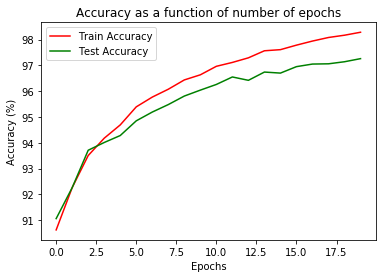

In [36]:
gbrassard = MLP(sizes, init_method)
optimizer = optim.SGD(gbrassard.parameters(), lr=lr, momentum=momentum)
plot_accuracy(gbrassard,trainloader,testloader,epochs,batch_size,optimizer,criterion)

### Subquestion 3

In [37]:
# Training params
criterion = nn.CrossEntropyLoss()
h0,h1,h2,h3 = 784,600,450,10
sizes = [h0,h1,h2,h3]
batch_size = 80
lr=0.01
momentum=0.9
init_method = torch.nn.init.xavier_uniform

# 100 epochs
epochs = 100

trainloader,testloader = load_MNIST(batch_size)

Finished Training
Train accuracy: 90.475
Test accuracy: 90.87
Finished Training
Train accuracy: 92.44333333333333
Test accuracy: 92.54
Finished Training
Train accuracy: 93.65166666666667
Test accuracy: 93.42
Finished Training
Train accuracy: 94.34333333333333
Test accuracy: 94.05
Finished Training
Train accuracy: 94.98333333333333
Test accuracy: 94.57
Finished Training
Train accuracy: 95.385
Test accuracy: 94.96
Finished Training
Train accuracy: 95.90333333333334
Test accuracy: 95.29
Finished Training
Train accuracy: 96.15166666666667
Test accuracy: 95.56
Finished Training
Train accuracy: 96.515
Test accuracy: 95.88
Finished Training
Train accuracy: 96.78
Test accuracy: 96.07
Finished Training
Train accuracy: 96.985
Test accuracy: 96.19
Finished Training
Train accuracy: 97.18666666666667
Test accuracy: 96.4
Finished Training
Train accuracy: 97.38
Test accuracy: 96.64
Finished Training
Train accuracy: 97.55666666666667
Test accuracy: 96.82
Finished Training
Train accuracy: 97.75
Test ac

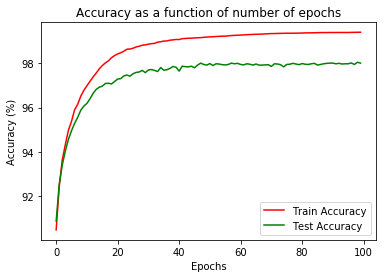

In [38]:
gbrassard = MLP(sizes, init_method)
optimizer = optim.SGD(gbrassard.parameters(), lr=lr, momentum=momentum)
plot_accuracy(gbrassard,trainloader,testloader,epochs,batch_size,optimizer,criterion)

### Subquestion 4

In [39]:
h0,h1,h2,h3 = 784,951,800,10
sizes = [h0,h1,h2,h3]

Finished Training
Train accuracy: 90.49666666666667
Test accuracy: 90.79
Finished Training
Train accuracy: 92.70166666666667
Test accuracy: 92.75
Finished Training
Train accuracy: 93.70166666666667
Test accuracy: 93.74
Finished Training
Train accuracy: 94.53666666666666
Test accuracy: 94.16
Finished Training
Train accuracy: 95.20833333333333
Test accuracy: 94.7
Finished Training
Train accuracy: 95.62333333333333
Test accuracy: 94.97
Finished Training
Train accuracy: 95.96333333333334
Test accuracy: 95.24
Finished Training
Train accuracy: 96.26833333333333
Test accuracy: 95.71
Finished Training
Train accuracy: 96.65833333333333
Test accuracy: 95.86
Finished Training
Train accuracy: 96.925
Test accuracy: 96.09
Finished Training
Train accuracy: 97.16
Test accuracy: 96.43
Finished Training
Train accuracy: 97.405
Test accuracy: 96.53
Finished Training
Train accuracy: 97.60333333333334
Test accuracy: 96.73
Finished Training
Train accuracy: 97.77166666666666
Test accuracy: 96.89
Finished Trai

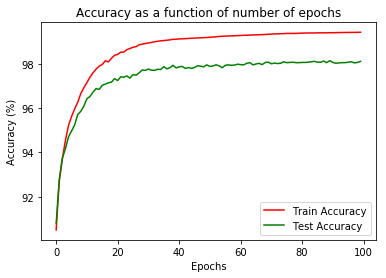

In [40]:
gbrassard = MLP(sizes, init_method)
optimizer = optim.SGD(gbrassard.parameters(), lr=lr, momentum=momentum)
plot_accuracy(gbrassard,trainloader,testloader,epochs,batch_size,optimizer,criterion)

### Subquestion 5 (Discuss the results)

By increasing the number of parameters, we decrease the bias to explore a larger set of candidate functions. We should have higher variance though because it is a trade-off, i.e., the accuracy curve would be less smooth. It is hard to tell from the figures we have. This is probably due to the fact that we already had 97% accuracy before doubling the number of parameters and so, we are not finding a function that is noticeably better.

## Training Set Size, Generalization Gap and Standard Error

### Subquestion 1, 2 and 3

In [6]:
# simulate a validation set
def get_train_val_acc(model,trainloader,trainset_ratio,validset_ratio):
    train_acc = 0
    valid_acc = 0
    train_size = int(trainset_ratio*len(trainloader))
    valid_size = int(validset_ratio*len(trainloader))
    if valid_size+train_size > len(trainloader):
        print("Ratios too big")
        return
    for i,train in enumerate(trainloader,0):
        inputs,labels = train
        inputs = Variable(inputs)
        labels = Variable(labels)
        if i > train_size and i < valid_size:
            valid_acc += float((((torch.max(model(inputs),1)[1]==labels).float().mean())*100.0))
        if i <= train_size:
            train_acc += float((((torch.max(model(inputs),1)[1]==labels).float().mean())*100.0))
    train_acc /= train_size
    valid_acc /= valid_size
    return train_acc, valid_acc

def get_gen_gap(model,epochs,criterion,optimizer,trainloader,testloader,trainset_ratio,validset_ratio):
    best_train = 0
    best_test = 0
    best_valid = 0
    for i in range(epochs):
        # Train
        model.train(trainloader,1,criterion,optimizer,trainset_ratio=trainset_ratio,quiet=True)
        # Get accuracy
        train_acc,valid_acc = get_train_val_acc(model,trainloader,trainset_ratio,validset_ratio)
        test_acc = get_acc(model,testloader)
        # update best
        if valid_acc > best_valid:
            best_train,best_valid,best_test = train_acc,valid_acc,test_acc
        #print(train_acc,valid_acc,test_acc)
    return best_train-best_test

In [7]:
# ratio for training set subsets
subset_ratios = [0.01,0.02,0.05,0.1,1]

# Training params
criterion = nn.CrossEntropyLoss()
h0,h1,h2,h3 = 784,600,450,10
sizes = [h0,h1,h2,h3]
batch_size = 80
lr=0.01
momentum=0.9
init_method = torch.nn.init.xavier_uniform

# 100 epochs
epochs = 100

trainloader,testloader = load_MNIST(batch_size)

In [8]:
gaps=[]
validset_ratio = 0.25
trainset_ratio = 0.75

for i in range(5):
    gap = []
    for a in subset_ratios:
        gbrassard = MLP(sizes, init_method)
        optimizer = optim.SGD(gbrassard.parameters(), lr=lr, momentum=momentum)
        gap.append(get_gen_gap(gbrassard,epochs,criterion,optimizer,trainloader,testloader,a*trainset_ratio,validset_ratio))
    gaps.append(gap)
print(gaps)

print("Subset sizes:",subset_ratios)
print("Mean gap for each subset sizes:",np.mean(gaps,0))
print("Standard error for each subset sizes:",np.std(gaps,0))

[[15.290000000000006, 9.3809090909091, 3.5785714285714363, 2.6371428571428623, 0], [16.099999999999994, 6.61272727272727, 3.9857142857142946, 2.2476785714285654, 0], [19.590000000000003, 9.00272727272727, 2.7049999999999983, 2.451607142857142, 0], [13.170000000000002, 8.841818181818184, 3.857857142857142, 1.825178571428566, 0], [16.989999999999995, 7.63181818181819, 3.2860714285714323, 1.658928571428575, 0]]
Subset sizes: [0.01, 0.02, 0.05, 0.1, 1]
Mean gap for each subset sizes: [16.228       8.294       3.48264286  2.16410714  0.        ]
Standard error for each subset sizes: [2.10386692 1.02459096 0.45747954 0.36972454 0.        ]


### Subquestion 4 (Comment the results)

It is mystifying that the gap and then standard error are both 0 whenever we are sampling with a=1 (full training set). It would mean that the error is exactly the same on the training set and the test set, to every decimal. Otherwise, we can see a convergence between the two error rates as the sampling size grows, which makes sense.

# Part 2

In [3]:
def search_lr(sizes,init_method,criterion,momentum,epochs,trainloader,validloader,testloader,lr_range):
    res = []
    for lr in lr_range:
        model = MLP(sizes,init_method)
        optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum)
        model.train(trainloader,epochs,criterion,optimizer,quiet=True)
        train_acc = get_acc(model,trainloader)
        valid_acc = get_acc(model,validloader)
        test_acc = get_acc(model,testloader)
        print("Learning rate:",lr,"\tTrain Accuracy:",train_acc,"\tValid Accuracy:",valid_acc)
        res.append((lr,train_acc,valid_acc,test_acc))
    return res

In [3]:
data_train = fetch_20newsgroups(data_home="data",subset="train",shuffle=True)
data_test = fetch_20newsgroups(data_home="data",subset="test",shuffle=True)
print('data loaded')
# order of labels in `target_names` can be different from `categories`
target_names = data_train.target_names
# split a training set and a test set
y_train, y_test = torch.Tensor(data_train.target), torch.Tensor(data_test.target)
end_train = int(0.8*len(y_train))
y_train, y_valid = y_train[:end_train], y_train[end_train:]

data loaded


## Build the model

In [4]:
n_features = 2**16

# Training params
criterion = nn.CrossEntropyLoss()
h0,h1,h2 = n_features,100,20
sizes = [h0,h1,h2]
momentum=0.9
init_method = torch.nn.init.xavier_uniform
epochs = 20
lr_range = [0.001,0.005,0.01,0.1,0.5]
batch_size = 300

In [5]:
def plot_acc(res):
    #Accuracy vs n. epochs
    xs = [r[0] for r in res]
    train_acc = [r[1] for r in res]
    valid_acc = [r[2] for r in res]
    test_acc = [r[3] for r in res]
        
    plt.figure()
    h1, = plt.plot(xs,train_acc,"r",label='Train Accuracy')
    h2, = plt.plot(xs,valid_acc,"g",label='Valid Accuracy')
    h3, = plt.plot(xs,test_acc,"b",label='Test Accuracy')
    plt.legend(handles=[h1,h2,h3])
    plt.xlabel("Learning rate")
    plt.ylabel("Accuracy (%)")
    plt.title("Accuracy as a function of Learning rate")
    plt.show()

### No Preprocessing

In [12]:
vectorizer = CountVectorizer(max_features=n_features,stop_words='english')
# load raw data
X_train = torch.Tensor(vectorizer.fit_transform(data_train.data).toarray()).float()
X_train,X_valid = X_train[:end_train],X_train[end_train:]
X_test = torch.Tensor(vectorizer.fit_transform(data_test.data).toarray()).float()

trainset = torch.utils.data.TensorDataset(X_train,y_train.long())
trainloader = torch.utils.data.DataLoader(trainset,batch_size=batch_size,num_workers=2,shuffle=True)

validset = torch.utils.data.TensorDataset(X_valid,y_valid.long())
validloader = torch.utils.data.DataLoader(validset,batch_size=batch_size,num_workers=2,shuffle=True)

testset = torch.utils.data.TensorDataset(X_test,y_test.long())
testloader = torch.utils.data.DataLoader(testset,batch_size=batch_size,num_workers=2,shuffle=True)

feature_names = vectorizer.get_feature_names()
print(len(feature_names))

65536


#### Learning rate search

In [ ]:
res = search_lr(sizes,init_method,criterion,momentum,epochs,trainloader,validloader,testloader,lr_range)
plot_acc(res)

Learning rate: 0.001 	Train Accuracy: 5.500316335308936 	Valid Accuracy: 4.418456077575684
Learning rate: 0.005 	Train Accuracy: 5.39531946182251 	Valid Accuracy: 4.243353858590126
Learning rate: 0.01 	Train Accuracy: 5.500316266090639 	Valid Accuracy: 4.488496840000153
Learning rate: 0.1 	Train Accuracy: 5.500316327618014 	Valid Accuracy: 4.453476548194885
Learning rate: 0.5 	Train Accuracy: 5.4263125081216135 	Valid Accuracy: 4.71012270450592


### tf-idf

In [7]:
vectorizer = TfidfVectorizer(max_features=n_features,stop_words='english')
# load raw data
X_train = torch.Tensor(vectorizer.fit_transform(data_train.data).toarray()).float()
X_train,X_valid = X_train[:end_train],X_train[end_train:]
X_test = torch.Tensor(vectorizer.fit_transform(data_test.data).toarray()).float()

trainset = torch.utils.data.TensorDataset(X_train,y_train.long())
trainloader = torch.utils.data.DataLoader(trainset,batch_size=batch_size,num_workers=2,shuffle=True)

validset = torch.utils.data.TensorDataset(X_valid,y_valid.long())
validloader = torch.utils.data.DataLoader(validset,batch_size=batch_size,num_workers=2,shuffle=True)

testset = torch.utils.data.TensorDataset(X_test,y_test.long())
testloader = torch.utils.data.DataLoader(testset,batch_size=batch_size,num_workers=2,shuffle=True)

feature_names = vectorizer.get_feature_names()
print(len(feature_names))

65536


#### Learning rate search

Learning rate: 0.001 	Train Accuracy: 5.757115756311724 	Valid Accuracy: 4.896727979183197
Learning rate: 0.005 	Train Accuracy: 6.812144310243668 	Valid Accuracy: 7.4769938588142395
Learning rate: 0.01 	Train Accuracy: 11.074636367059522 	Valid Accuracy: 9.691973567008972
Learning rate: 0.1 	Train Accuracy: 7.853890034460252 	Valid Accuracy: 6.628578841686249
Learning rate: 0.5 	Train Accuracy: 36.70208734081638 	Valid Accuracy: 33.6543972492218


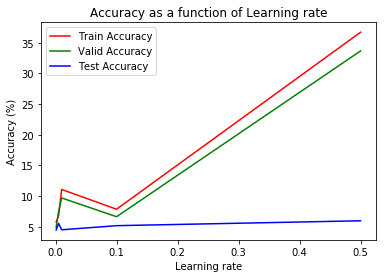

In [8]:
res = search_lr(sizes,init_method,criterion,momentum,epochs,trainloader,validloader,testloader,lr_range)
plot_acc(res)

### Standardization

In [8]:
def standardize(tensor,means,variances,epsilon=1*(10**(-5))):
    for i,row in enumerate(tensor):
        for j,col in enumerate(row):
            tensor[i,j] = (col - means[j])/(variances[j]+epsilon)
        
vectorizer = CountVectorizer(max_features=n_features,stop_words='english')
# load raw data
X_train = torch.Tensor(vectorizer.fit_transform(data_train.data).toarray()).float()
X_test = torch.Tensor(vectorizer.fit_transform(data_test.data).toarray()).float()
#standardize
means = X_train.mean(dim=0)
variances = X_train.std(dim=0)
standardize(X_train,means,variances)
standardize(X_test,means,variances)

X_train,X_valid = X_train[:end_train],X_train[end_train:]

trainset = torch.utils.data.TensorDataset(X_train,y_train.long())
trainloader = torch.utils.data.DataLoader(trainset,batch_size=batch_size,num_workers=2,shuffle=True)

validset = torch.utils.data.TensorDataset(X_valid,y_valid.long())
validloader = torch.utils.data.DataLoader(validset,batch_size=batch_size,num_workers=2,shuffle=True)

testset = torch.utils.data.TensorDataset(X_test,y_test.long())
testloader = torch.utils.data.DataLoader(testset,batch_size=batch_size,num_workers=2,shuffle=True)
                
feature_names = vectorizer.get_feature_names()
print(len(feature_names))

65536


#### Learning rate search

Learning rate: 0.001 	Train Accuracy: 5.290322672936224 	Valid Accuracy: 4.48849692940712
Learning rate: 0.005 	Train Accuracy: 5.478810864110147 	Valid Accuracy: 4.71012270450592
Learning rate: 0.01 	Train Accuracy: 5.342821059688445 	Valid Accuracy: 4.4884969890117645
Learning rate: 0.1 	Train Accuracy: 5.373814090605705 	Valid Accuracy: 4.8502044677734375
Learning rate: 0.5 	Train Accuracy: 5.500316281472483 	Valid Accuracy: 4.663599282503128


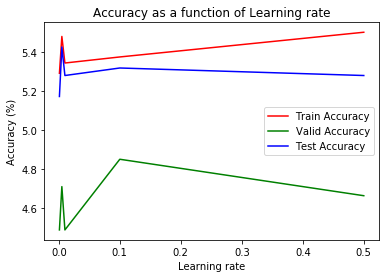

In [9]:
res = search_lr(sizes,init_method,criterion,momentum,epochs,trainloader,validloader,testloader,lr_range)
plot_acc(res)

### Comments

1. Based on the results, we clearly see that tf-idf has a much better performance than the other two. There is a significant difference in its accuracy when we change the learning rate as opposed to no preprocessing and standardization where the accuracy stays more or less the same, irregardless of the learning rate.

2. 
    a) No. For tf-idf, there is a significant difference in accuracy when we vary the learning rate. For the other two, the learning rate doesn't seem to make a significant difference for the values we tried.
    
    b) if $\epsilon=0$ , it means the denominator is smaller, which will increase the variance. This will reduce the extent to which the inputs are standardized. Besides modifying $\epsilon$, we could increase the dataset size.
    
    c) tf-idf helps identifying the words that has the most pertinence to the document. It gives a better score to words that appears often in a document, but is reduced if the word is too frequent in other documents. It helps tying words that have common charasteristics tied to a class.
    
    
    

## Variance in the training

In [6]:
vectorizer = TfidfVectorizer(max_features=n_features,stop_words='english')

# load raw data
end_train = 5000
X_train = torch.Tensor(vectorizer.fit_transform(data_train.data).toarray()).float()
X_train = X_train[:end_train]

y_train = torch.Tensor(data_train.target)
y_train = y_train[:end_train]

trainset = torch.utils.data.TensorDataset(X_train,y_train.long())
trainloader = torch.utils.data.DataLoader(trainset,batch_size=1,num_workers=2,shuffle=True)

gbrassard = MLP(sizes,init_method)
optimizer = optim.SGD(gbrassard.parameters(), lr=0.5)
losses_1 = gbrassard.train(trainloader,1,criterion,optimizer,verbose=True)

[0] Mean Train loss: 2.993
Finished Training


In [7]:
print(len(losses_1))
vectorizer = TfidfVectorizer(max_features=n_features,stop_words='english')

# load raw data
trainloader = torch.utils.data.DataLoader(trainset,batch_size=100,num_workers=2,shuffle=True)

gbrassard = MLP(sizes,init_method)
optimizer = optim.SGD(gbrassard.parameters(), lr=0.5)
losses_100 = gbrassard.train(trainloader,100,criterion,optimizer,verbose=True)

5000
[0] Mean Train loss: 2.996
[1] Mean Train loss: 2.996
[2] Mean Train loss: 2.995
[3] Mean Train loss: 2.995
[4] Mean Train loss: 2.995
[5] Mean Train loss: 2.995
[6] Mean Train loss: 2.995
[7] Mean Train loss: 2.995
[8] Mean Train loss: 2.995
[9] Mean Train loss: 2.995
[10] Mean Train loss: 2.994
[11] Mean Train loss: 2.994
[12] Mean Train loss: 2.994
[13] Mean Train loss: 2.994
[14] Mean Train loss: 2.994
[15] Mean Train loss: 2.994
[16] Mean Train loss: 2.993
[17] Mean Train loss: 2.993
[18] Mean Train loss: 2.993
[19] Mean Train loss: 2.993
[20] Mean Train loss: 2.993
[21] Mean Train loss: 2.993
[22] Mean Train loss: 2.992
[23] Mean Train loss: 2.992
[24] Mean Train loss: 2.992
[25] Mean Train loss: 2.992
[26] Mean Train loss: 2.992
[27] Mean Train loss: 2.992
[28] Mean Train loss: 2.991
[29] Mean Train loss: 2.991
[30] Mean Train loss: 2.991
[31] Mean Train loss: 2.991
[32] Mean Train loss: 2.990
[33] Mean Train loss: 2.990
[34] Mean Train loss: 2.990
[35] Mean Train loss: 2.9

In [8]:
#Accuracy vs n. epochs
xs = [i for i in range(5000)]
plt.figure()
h1, = plt.plot(xs,losses_1,"r",label='batch_size=1')
h2, = plt.plot(xs,losses_100,"g",label='batch_size=100')
plt.legend(handles=[h1,h2])
plt.xlabel("Batch size")
plt.ylabel("Loss")
plt.show()

## Variance in training

1. The variance gets smaller the greater the batch size is. By taking a gradient step with a larger batch, we do some kind of gradient averaging, in some ways, so the variance gets smaller.

2. Reducing the learning rate. That would simulate some kind of averaging by giving less importance to each gradients. Otherwise we could have a momentum that would also simulate a kind of averaging.
